# From Linear Algebra to Linear Regression - the ML Perspective

The idea of truly understanding machine learning without any math is a myth.  I would argue that AI can be understood and applied in business world without knowing any math or even programming.  But for a tech person, some rather rudimentary math is a must.  This article collect what I believe to be neccessary to grasp, at least at the conceptual level, to truly understand the foundamental aspects of learning.  After all, ML is about math formulas at its core.

In this tutorial, we will cover _all_ the mathematically concepts that we use in machine learning:
- Linear algebra
- Design matrices
  - NumPy support
- Linear regression
  - Polynomial regression
- Logarithms
- Calculus
  - Partial derivatives
  - Gradient descent
  - Rules (chain rule, product rule, quotient rule)
- Loss functions
- Probability and uncertainty

We will provide practical code examples and visuals when appropriate to help you understand the concepts.

## Linear Algebra

It all started with linear algebra, which is a branch of mathematics concerning linear equations such as:
$$ a_1x_1 +  \dots + a_nx_n $$
linear maps such as:
$$ (x_1,\dots,x_n) \mapsto a_1x_1 + \dots + a_nx_n $$
and their represenations in vector spaces through matrices such as:
\begin{bmatrix}
a_11 & a_12 & a_13\\
a_21 & a_22 & a_23\\
\vdots & \vdots & \vdots\\
a_m1 & a_m2 & a_m3
\end{bmatrix}

### Matrix

A matrix is a rectangular array of numbers, symbols, or expressions, arranged in rows and columns.  It is a fundamental concept in linear algebra and is used in various fields such as statistics, machine learning, and engineering.  A matrix is denoted by a capital letter, such as $A$, $B$, or $C$.  The elements of a matrix are denoted by a lowercase letter, such as $a_{ij}$, where $i$ is the row index and $j$ is the column index.  The order of a matrix is the number of rows and columns it has.  A matrix with $m$ rows and $n$ columns is said to be an $m\times n$ matrix.  The element in the $i$-th row and $j$-th column of a matrix $A$ is denoted by $a_{ij}$.

The existance of matrics is a key to the success of linear algebra.  It allows us to represent and manipulate linear equations and transformations in a concise and efficient manner.  Matrices are used in various fields such as statistics, machine learning, and engineering.  They are used to represent data, perform calculations, and solve systems of linear equations.  Matrices are also used to represent transformations such as rotations, reflections, and scaling.

#### Key Components of a Matrix

1. Rows: Each row in the matrix represents a single observation or data point.
2. Columns: Each column represents a feature or predictor variable.  The columns may include:
- Independent Variables: The features used to predict the dependent variable.
- Intercept Term: A column of ones(if included)to account for the intercept term in the linear model.
- Interaction Terms: Columns representing interactions between features.
- Polynomial Terms: Columns representing higher-order terms of the features.


### Design Matrix

It is though such a hussle to write down each similar down.  So now we use the matrix notation.  It may not be entirely approapriate to address matrix as a notation.  But the point is that it achieves the goal to shorthand or condense a long list of things into an extremely succinct form.  For this we use what's call a design matrix, denoted as $X$ in statistical modeling and machine learning.  It represents the features/predictors of the model where each row represents an observation or sample; each column represents a feature variable.  It is called "design" matrix because it's specifically structured to represent the design of the experiment or study.  In linear regression, we would write: $y = X\beta + \epsilon$ where $y$ is the vector of dependent variable values, $X$ is the design matrix, $\beta$ is the vector of coefficients, and $\epsilon$ is the vector of errors.  

The famous `NumPy` library provides all sorts of matrix manipulations one can imagine.  A _design matrix_ (often denoted as $X$) is a fundamental concept in statistics and machine learning, particularly in the context of linear regression and other linear models.  It is a matrix that organizes the data in a way that facilitates the application of linear models.

#### Key Components of a Design Matrix

1. Rows: Each row in the design matrix represents a single observation or data point.
2. Columns: Each column represents a feature or predictor variable.  The columns may include:
- Independent Variables: The features used to predict the dependent variable.
- Intercept Term: A column of ones(if included)to account for the intercept term in the linear model.
- Interaction Terms: Columns representing interactions between features.
- Polynomial Terms: Columns representing higher-order terms of the features.

#### Structure of a Design Matrix

For a dataset with $n$ observations and $p$ features, the design matrix $X$ is an $n\times(p+1)$ matrix (if an intercept term is included).  The structure is as follows:

$$
X=
\begin{bmatrix}
1&x{11}&x{12}&\dots&x{1p}\\
1&x{21}&x{22}&\dots&x{2p}\\
\vdots&\vdots&\vdots&\ddots&\vdots\\
1&x{n1}&x{n2}&\dots&x{np}\\
\end{bmatrix}
$$

- The first column(all ones)represents the intercept term.
- The remaining columns represent the features $x{ij}$, where $i$ is the observation index and $j$ is the feature index.

##### Example

Consider a simple dataset with 3 observations and 2 features(`Length`and`Width`):

| Observation |	 Length  |	 Width |
|-------------|----------|---------|
| 1           |	 1       |	 2     |	
| 2           |	 2       |	 3     |	
| 3           |	 3       |	 4     |	



The design matrix\(X\)(including an intercept term)would be:

$$
X=
\begin{bmatrix}
1&1&2\\
2&2&3\\
3&3&4\\
\end{bmatrix}
$$


#### Importance of the Design Matrix

1. Linear Regression: In linear regression,the design matrix $X$ is used to compute the model coefficients $\beta$ using the formula:
    $\hat{\beta}=(X^T X)^{-1}X^T y$ where $y$ is the vector of dependent variable values.
2. Generalized Linear Models(GLMs): The design matrix is also used in GLMs, where it helps transform the linear predictor into the response variable through a link function.
3. Feature Engineering: The design matrix can include polynomial terms, interaction terms,and other transformations of the original features to capture more complex relationships.
4. Model Interpretation: The columns of the design matrix correspond directly to the features in the model, making it easier to interpret the coefficients.



In [37]:
"""
Example Design Matrix

| |  Intercept|  Length1|  Width|
|-|-----------|---------|-------|
|0|  1        |1        |2      |
|1|  1        |2        |3      |
|2|  1        |3        |4      |
"""
import numpy as np
import pandas as pd

# Sample data
data = {
    'Length': [1, 2, 3],
    'Width': [2, 3, 4]
}

df = pd.DataFrame(data)

# Add an intercept term (column of ones)
df['Intercept'] = 1

# Create the design matrix
X = df[['Intercept', 'Length', 'Width']]

print("Design Matrix:\n", X)

Design Matrix:
    Intercept  Length  Width
0          1       1      2
1          1       2      3
2          1       3      4


#### Summary
- A design matrix is a structured representation of the data used in linear models.
- It is a matrix containing data about multiple characteristics of several individuals or objects. Each row corresponds to an individual and each column to a characteristic.
- It includes columns for the intercept term,independent variables,and possibly interaction or polynomial terms.
- It is essential for fitting linear regression models and other linear models,as well as for interpreting the results.

#### Transpose of a Matrix
The transpose of a matrix is when you flip it over its main diagonal, turning rows into columns and columns into rows. For a matrix $A$, its transpose is written as $A^T$.

For example:
- If $A = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$, then $A^T = \begin{bmatrix} 1 & 3 \\ 2 & 4 \end{bmatrix}$.

Simply put, it’s like rotating the matrix so what was horizontal becomes vertical and vice versa, using the top-left to bottom-right diagonal as the pivot.

#### Inverse of a Matrix
The inverse of a matrix $A$, written $A^{-1}$, is a special matrix that “cancels out” $A$ when multiplied together, giving you the identity matrix $I$ (a matrix with 1s on the diagonal and 0s elsewhere). Think of it like a reverse button: $A \cdot A^{-1} = I$ and $A^{-1} \cdot A = I$.

For example, if $A = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$, its inverse $A^{-1}$ exists if it can undo $A$, but only if $A$ isn’t “flat” (its determinant isn’t zero). It’s like finding the opposite move to get back to where you started.

#### Identity Matrix
An identity matrix, written as $I$, is a square matrix (same number of rows and columns) with 1s on the main diagonal (top-left to bottom-right) and 0s everywhere else. It acts like the number 1 in matrix multiplication—multiplying any matrix by $I$ leaves it unchanged.

For example:
- A 2x2 identity matrix is $I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$.
- If you multiply any 2x2 matrix $A$ by this $I$, you get $A$ back: $A \cdot I = A$ and $I \cdot A = A$.

Simply put, it’s the “do-nothing” matrix that keeps things the same.


#### Adjacency Matrix

An adjacency matrix is a square matrix that represents the connections between nodes in a graph.  It is a matrix where the rows and columns represent the nodes in the graph, and the entries represent the connections between the nodes.  It is called "adjacency" because it describes how the nodes are connected to each other.

For example, if we have a graph with 3 nodes, the adjacency matrix would be:

$$
A = \begin{bmatrix} 0 & 1 & 0 \\ 1 & 0 & 1 \\ 0 & 1 & 0 \end{bmatrix}
$$

The entry $A_{ij}$ is 1 if there is an edge from node $i$ to node $j$, and 0 otherwise.

#### Numpy Matrix Operations

In [39]:
"""
Code examples for design matrix
`numpy.matrix.T`: transpose of a matrix.
`numpy.matrix.I`: inverse of a matrix.
"""
import numpy as np
m = np.matrix('[1, 2; 3, 4]')
print(f"Original Matrix:\n {m}")
print(f"Transposed Matrix:\n {m.T}")
print(f"Inversed Matrix:\n {m.I}")
print(m * m.I)

Original Matrix:
 [[1 2]
 [3 4]]
Transposed Matrix:
 [[1 3]
 [2 4]]
Inversed Matrix:
 [[-2.   1. ]
 [ 1.5 -0.5]]
[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


#### Linear Algebra `numpy.linalg`

This would be one of those packages you can't live without, once you get into ML programming.

##### The @ Operator
The `@` operator is used for matrix multiplication in NumPy.  It is equivalent to the `np.dot()` function, but it is more concise and readable.  It's the preferred way to perform matrix (2d array) multiplication in NumPy.

##### Matrix Manipulation
- `linalg.inv(a)`: calculate the inverse of a matrix.
- `numpy.linalg.matrix_power(a, n)`: raise a square matrix to the (integer) power n.
- `numpy.linalg.matrix_rank(M)`: compute the rank of a matrix.
- `numpy.linalg.det(a)`: compute the determinant of an array.
- `numpy.linalg.eig(a)`: compute the eigenvalues and eigenvectors of a square array.
- `numpy.linalg.svd(a, full_matrices=True, compute_uv=True, hermitian=False)`: singular value decomposition.
- `numpy.linalg.cholesky(a)`: compute the Cholesky decomposition of a matrix.

##### Matrix Multiplication
Each element in the resulting matrix is computed by taking the dot product of a row from the first matrix with a column from the second matrix.
```
[1 2] × [5 6] = [1×5 + 2×7  1×6 + 2×8] = [19 22]
[3 4]   [7 8]   [3×5 + 4×7  3×6 + 4×8]   [43 50]
```

In [47]:
import numpy as np

# Create two matrices
A = np.array([[1, 2],
              [3, 4]])
B = np.array([[5, 6],
              [7, 8]])

# Matrix multiplication using @
C = A @ B
# Or using np.dot()
C = np.dot(A, B)

print(C)

[[19 22]
 [43 50]]


#### Singular Value Decomposition (SVD)

SVD is a way to break down a matrix into three simpler metrices.  It is like factoring a number into its prime components, but for metrices.

The basic formula is:

$ A = U \Sigma V^T $

Where:

- $A$ is the original matrix.
- $U$ is an orthogonal matrix whose columns are the left singular vectors of $A$.
- $\Sigma$ is a diagonal matrix whose entries are the singular values of $A$.
- $V^T$ is the transpose of an orthogonal matrix whose columns are the right singular vectors of $A$.





In [4]:
import numpy as np

# Create a simple matrix
A = np.array([[1, 2, 3], [4, 5, 6]])

# Print the matrix
print("Matrix A:")
print(A)

# Print the transpose of the matrix
print("Transpose of A:")
print(A.T)

# Perform SVD
U, s, Vh = np.linalg.svd(A)
print("\nU matrix:")
print(U)

print("\nSingular values:")
print(s)

print("\nVh matrix:")
print(Vh)

# Reconstruct the matrix
# A_reconstructed = U @ np.diag(s) @ Vh
# print("Reconstructed matrix:")
# print(A_reconstructed)

Matrix A:
[[1 2 3]
 [4 5 6]]
Transpose of A:
[[1 4]
 [2 5]
 [3 6]]

U matrix:
[[-0.3863177  -0.92236578]
 [-0.92236578  0.3863177 ]]

Singular values:
[9.508032   0.77286964]

Vh matrix:
[[-0.42866713 -0.56630692 -0.7039467 ]
 [ 0.80596391  0.11238241 -0.58119908]
 [ 0.40824829 -0.81649658  0.40824829]]


#### Singluar Values ($\Sigma$)
- Represent the "importance" of the features.
- Always non-negative.
- Ordered from largest to smallest.
- Tells us about the rank and stability of the matrix.

#### U Matrix
- Left singular vectors.
- Represents the patterns in the rows.
- Orthogonal (perpendicular) to each other.

#### $V^T$ Matrix
- Right singular vectors.
- Represents the patterns in the columns.
- Orthogonal (perpendicular) to each other.


## Linear Regression
Now it's time to see what linear regression is after the discussion on linear algebra. Regression is a staticall method used to model and analyze the relationship between a dependen variable (target) and one of more independent variables (predictors).

Linear regression is a technique used to determine the best-fitting line (or hyperplaine for multiple variables) that descries the relationship between independent variables and the dependent variable.  The goal is to minimize the difference (error) between the actual and the predicted values.

A __simple linear regression__ is represented as:

$$ y = \beta_0 + \beta_1x + \epsilon $$

Where:

- y is athe dependent variable (target)
- x is the independent variable (predictor)
- $\beta_0$ is the y-intercept (see below)
- $\beta_1$ is the slope (coefficient - see below)
- $\epsilon$ is the error term

For __multiple linear regression__, the equation extends to:

$$ y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n + \epsilon $$

Where multiple independent variables ($x_1$, $x_2$, $\dots$, $x_n$) influence the dependent variable.

The __goal of linear regression__ is to estimate the coefficients (\beta) in such a way that the sum of squared errors (differences between actual and predicted values) is minimized, which is often done using __Ordinary Least Squares (OLS).__

### Intercept and Coefficient

In a Linear Regression model, the intercept and coefficients are fundamental components that define the linear relationship.

### Intercept ($\beta_0$ or bias)
   - It is the value of the dependent variable $(y)$ when all the independent varialbes $(x)$ are *zero*
   - It represents the starting point ($x=0$ of the regression line on the $y-axis$
   - It can be obtained from the model object: $model.intercept\_$

#### Example

Suppose we model house prices (y) based on the size of the house (x):

$ price = 50,000 + 200 \times size $

Where: 50,000 is the intercept, meaning when the house is of size zero, the land costs $50,000

  
### Coefficient ($\beta_1, \beta_2$ or weight)

   - It is the _slope_ which represents the change in the dependent variable $(y)$ for a one-unit change in the independent variable $(x)$, assuming all the other variables remain constant.
   - It can be obtained from the model object: $model.coef\_$)
   - $(x)$ is called a feature in machine learning

Given:

$ y = model.intercept\_ + (model.coef_0 \times Feature1) + (model.coef_1 \times Feature2) $

Where:
- $y$ is the prediction
  
When:
- $intercept$ = 2
- $coefficient_0$ = 3
- $coefficient_1$ = 4

Then:
- When all features are 0, prediction = 2, which is the intercept or $\beta_0$ or bias
- For each unit increase in Feature1, prediction (y) increases by 3
- For each unit increase in Feature2, prediction increases by 4

#### Example

Using the same house price model:

$ price = 50,000 + 200 \times size $

Where:
the coefficient 200 means that for every additional square foot, the price incereases by \$200.
- A positive coefficient means that as $x$ increases, $y$ also increases.
- A negative coefficient means that as $x$ increases, $y$ decreases.

### Residuals

Residuals refer to the differences between the actual observed values (the true target values) and the predicted values made by a model. Essentially, residuals measure the error in the model's predictions for each data point.

#### Formal Definition

For a dataset with $(n)$ samples, let:
- $y_i$ be the actual value of the target variable for the i-th sample.
- $\hat{y}_i$ be the predicted value for the i-th sample from the model.

The residual for the i-th sample is:

$r_i = y_i - \hat{y}_i$

#### What Residuals Tell Us

- Model Fit: Residuals indicate how well the model fits the data. Small residuals suggest the model's predictions are close to the true values, while large residuals indicate poor predictions.
- Patterns in Errors: By analyzing residuals (e.g., plotting them), you can detect patterns:
    - If residuals are randomly scattered around zero, the model might be a good fit.
    - If residuals show a systematic pattern (e.g., increasing with the predicted value), it could indicate the model is missing some structure in the data (e.g., nonlinearity or omitted variables).
- Assumptions Checking: In linear regression, residuals are used to check assumptions like:
    - Homoscedasticity: Residuals should have constant variance across all levels of the predicted values.
    - Normality: Residuals should be approximately normally distributed for certain statistical tests to be valid.

#### Example
Imagine you’re predicting someone’s weight based on their height:

- True weight ($y_i$): 70 kg
- Predicted weight ($\hat{y}_i$): 68 kg
- Residual ($r_i$): 70 - 68 = 2 kg

If another prediction was 72 kg, the residual would be 70 - 72 = -2 kg.

Assume a linear regression:

residuals = y - y_pred

Here, $y$ is the true Weight values from the training data, and y_pred is what the linear regression model predicts. The variance of these residuals (sigma2) is then used to estimate the uncertainty in the model’s coefficients, which helps quantify how much confidence you can have in the predictions.

#### Why Residuals Matter

- Training: They’re used to compute metrics like Mean Squared Error (MSE) to optimize the model.
- Diagnostics: They help diagnose issues like overfitting, underfitting, or model misspecification.
- Uncertainty: They contribute to calculating the covariance matrix, which is used to estimate prediction uncertainty.

In short, residuals are a fundamental concept for understanding and improving a model's performance.

### Uncertainty

Uncertainty in coefficients refers to the degree of variability or lack of precision in the estimated values of a model's coefficients (parameters). In linear regression, these coefficients represent the weights assigned to each feature in the design matrix.  The uncertainty in these coefficients reflects how confident we can be in their specific values based on the data and model assumptions.

#### Implications of Uncertainty in coefficients:

- Confidence in the Model: High uncertainty (large variance in the coefficients) suggests that the coefficients could take on a wide range of values, meaning we’re less certain about the exact relationship between the features and the target variable.
- Low uncertainty (small variance) indicates that the coefficients are more precisely estimated, giving us greater confidence in the model's interpretation.
- Impact on Predictions: Coefficients with high uncertainty can lead to greater variability in the model’s predictions when applied to new data. This is because small changes in the input data could result in significantly different outputs if the coefficients aren’t well-constrained.  In the example below, uncertainty propagates to the predicted values (y_pred_std), which is why there are error bars in the plot.
- Feature Importance:
    - If a coefficient has high uncertainty (e.g., its confidence interval includes zero), it might imply that the corresponding feature doesn’t have a statistically significant effect on the target variable. This is often tested in statistical settings with p-values or confidence intervals.
    - Low uncertainty around a non-zero coefficient suggests the feature is reliably contributing to the prediction.
- Data Quality and Quantity: High uncertainty often arises from limited data (small sample size), noisy data, or collinearity between features, which makes it hard to pin down precise coefficient values. More data or better-quality data typically reduces uncertainty by providing more evidence to estimate the coefficients.
- Model Assumptions: Uncertainty estimates assume the model is correctly specified (e.g., linear relationships in linear regression). If the model doesn’t fit the data well (e.g., residuals show patterns), the reported uncertainty might be misleading.

#### Uncertainty Calculation (Covariance of the Coefficient)
The uncertainty in the coefficients can be quantified using the covariance matrix of the coefficients. For a linear regression model, the covariance matrix of the coefficients is given by:

$$\text{Cov}(\hat{\beta}) = \sigma^2 (X^T X)^{-1}$$

where:
- $\sigma^2$ is the variance of the residuals, representing the noise in the data.
- $X$ is the design matrix.
- $(X^TX)^{-1}$: The inverse of the design matrix’s Gram matrix $X^T X$, which depends on the spread and correlation of the input features.  The inverse of the matrix $X^T X$ can be obtained by using NumPy's `np.linalg.inv()` function.
- $\hat{\beta}$ is the vector of estimated coefficient.
- The diagonal elements of the covariance matrix give the variance of each coefficient, and the square root of these is the standard error (a measure of uncertainty).
- Off-diagonal elements indicate how coefficients covary (e.g., if two features are highly correlated, their coefficients might have high covariance).
- The multivariate_normal.rvs can be used to sample possible coefficient values from this distribution, reflecting the uncertainty in the estimates.

The variance of the residuals ($\sigma^2$) can be calculated as:

$$\sigma^2 = \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{n - p}$$

where:
- $y_i$ is the observed value.
- $\hat{y}_i$ is the predicted value.
- $n$ is the number of observations.
- $p$ is the number of parameters (including the intercept).

#### Practical Implications

- Interpretation: Suppose a coefficient for Length is 2.5 with a standard error of 0.1. You’d be pretty confident it’s around 2.5, and it’s likely significant.  If the standard error were 3.0, the coefficient could plausibly range from -0.5 to 5.5, making it hard to say whether Length truly matters.
- Decision-Making: High uncertainty might prompt you to collect more data, simplify the model (e.g., remove collinear features), or use regularization (like Ridge regression) to stabilize the coefficients.
- Uncertainty Propagation: The uncertainty in coefficients translates to uncertainty in predictions (y_pred_std), which is visualized as error bars. This helps one to communicate not just a point estimate but a range of plausible outcomes.

#### Example

Imagine a model predicts Weight with coefficients:
- `Length`: 2.0 (std error = 0.5)
- `Width`: 1.5 (std error = 1.2)
- `Height`: 3.0 (std error = 0.2)
- `Height` has low uncertainty (tightly estimated at 3.0), so you’re confident in its effect.
- `Width` has high uncertainty (could range from 0.3 to 2.7), so its effect is less certain.

This might suggest `Width` is _less_ reliably estimated, perhaps due to noise or correlation with other features.

#### Summary
Uncertainty in coefficients reflects how much the estimates might vary due to randomness in the data or model limitations. It affects how much trust you place in the model’s parameters and predictions, guiding further analysis or data collection. It’s a key step in quantifying prediction uncertainty, making results more robust and interpretable.

#### Coding examples for Uncertainty Calculation

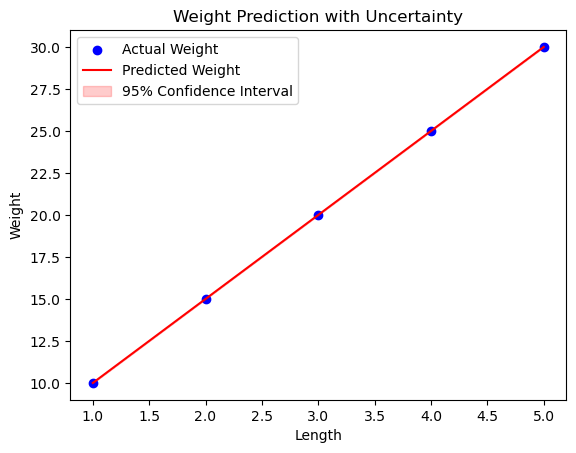

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.971e+30
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           4.31e-46
Time:                        09:46:30   Log-Likelihood:                 155.79
No. Observations:                   5   AIC:                            -307.6
Df Residuals:                       3   BIC:                            -308.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.609e-15    4.1e-15      0.636      0.5

/opt/anaconda3/envs/ml_study/lib/python3.12/site-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/opt/anaconda3/envs/ml_study/lib/python3.12/site-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
/opt/anaconda3/envs/ml_study/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


'\nThe summary includes:\n- Coefficients\n- Standard errors of the coefficients\n- t-statistics\n- p-values\n- Confidence intervals\n'

In [ ]:
"""
Using Statsmodels for Uncertainty Estimation
Statsmodels is a powerful statistical library that provides detailed regression analysis, 
including uncertainty estimates for the coefficients.
"""
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Sample data
data = {
    'Length': [1, 2, 3, 4, 5],
    'Width': [2, 3, 4, 5, 6],
    'Height': [3, 4, 5, 6, 7],
    'Weight': [10, 15, 20, 25, 30]
}
df = pd.DataFrame(data)

# Design matrix and target variable
X = df[['Length', 'Width', 'Height']]
y = df['Weight']

# Add a constant term to the design matrix (for the intercept)
X = sm.add_constant(X)

# Fit the OLS model a.k.a. finding the best coefficients.
model = sm.OLS(y, X).fit()

# Get predictions and confidence intervals
predictions = model.get_prediction(X)
pred_summary = predictions.summary_frame(alpha=0.05)  # 95% confidence

# Plot actual vs predicted with uncertainty Matplotlib
plt.scatter(df['Length'], y, color='blue', label='Actual Weight')
plt.plot(df['Length'], pred_summary['mean'], color='red', label='Predicted Weight')
plt.fill_between(df['Length'], pred_summary['mean_ci_lower'], pred_summary['mean_ci_upper'], 
                 color='red', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.title('Weight Prediction with Uncertainty')
plt.show()

# Print the summary
print(model.summary())
"""
The summary includes:
- Coefficients: How much each variable (like Length) affects Weight.
- Standard Errors: A measure of uncertainty—how much these coefficients might vary if we had different data. Smaller errors mean more confidence.
- Confidence Intervals:  
    - A coefficient interval is usually presented as a range, such as [a, b] , where a is the lower bound and b is the upper b bound.
    - Confidence Level: These intervals are often associated with a confidence level (e.g., 95% or 99%). This means that if you were to repeat the experiment or sampling many times, the true coefficient would fall within this interval in the specified percentage of cases.
- P-values: These test if the effect of each variable is real or just random noise (low p-value = more certain it’s real).
"""

Coefficients: [1.66666685 1.66666662 1.66666651]
Coefficient standard deviations: [2.35702053 2.35702053 2.35702053]


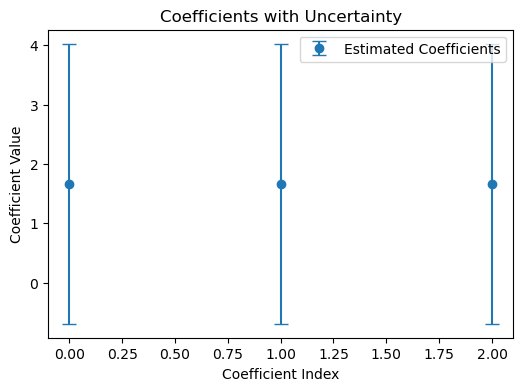

In [ ]:
"""
Using BayesianRidge from scikit-learn
BayesianRidge is a Bayesian linear regression model that provides uncertainty estimates for the coefficients.
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge

# Sample data
data = {
    'Length': [1, 2, 3, 4, 5],
    'Width': [2, 3, 4, 5, 6],
    'Height': [3, 4, 5, 6, 7],
    'Weight': [10, 15, 20, 25, 30]
}
df = pd.DataFrame(data)

# Design matrix and target variable
X = df[['Length', 'Width', 'Height']]
y = df['Weight']

# Fit the Bayesian Ridge Regression model
model = BayesianRidge(compute_score=True)
model.fit(X, y)

# Print the coefficients and their standard deviations
print("Coefficients:", model.coef_)
# model.sigma_ is the covariance matrix of the coefficients. In Bayesian linear regression,
# it represents the uncertainty in the estimated coefficients.
# np.diag(model.sigma_) extracts the diagonal elements of the covariance matrix, 
# which correspond to the variances of the estimated coefficients.
# np.sqrt() calculates the square root of each element in the resulting array,
# which effectively converts the variances into standard deviations, or how
# uncertain the estimated coefficients are.
print("Coefficient standard deviations:", np.sqrt(np.diag(model.sigma_)))

# Plot the true weights, estimated weights, and their uncertainties
plt.figure(figsize=(6,4))
plt.errorbar(range(len(model.coef_)), 
             model.coef_, 
             yerr=np.sqrt(np.diag(model.sigma_)), 
             fmt='o', capsize=5, label='Estimated Coefficients')
plt.title('Coefficients with Uncertainty')
# Coefficient Index: This represents the index of each coefficient in the model.
plt.xlabel('Coefficient Index')
# Coefficient Value: This is the estimated value of the coefficient.
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()


Mean coefficients: [1.66166667 1.66166667 1.66166667]
Standard deviations of coefficients: [0.09115006 0.09115006 0.09115006]


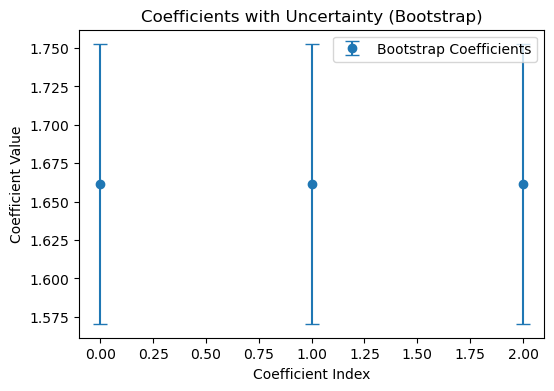

In [31]:
"""
Bootstrapping for Uncertainty Estimation
Bootstrapping is a resampling technique that can be used to estimate the uncertainty of the coefficients.
"""
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample

# Sample data
data = {
    'Length1': [1, 2, 3, 4, 5],
    'Width': [2, 3, 4, 5, 6],
    'Height': [3, 4, 5, 6, 7],
    'Weight': [10, 15, 20, 25, 30]
}
df = pd.DataFrame(data)

# Design matrix and target variable
X = df[['Length1', 'Width', 'Height']]
y = df['Weight']

# Number of bootstrap samples
n_bootstrap_samples = 1000

# Initialize arrays to store bootstrap estimates
bootstrap_coefs = np.zeros((n_bootstrap_samples, X.shape[1]))

# Perform bootstrapping
for i in range(n_bootstrap_samples):
    X_sample, y_sample = resample(X, y)
    model = LinearRegression()
    model.fit(X_sample, y_sample)
    bootstrap_coefs[i] = model.coef_

# Calculate mean and standard deviation of bootstrap estimates
mean_coefs = np.mean(bootstrap_coefs, axis=0)
std_coefs = np.std(bootstrap_coefs, axis=0)

print("Mean coefficients:", mean_coefs)
print("Standard deviations of coefficients:", std_coefs)

# Plot the bootstrap estimates
plt.figure(figsize=(6, 4))
plt.errorbar(range(len(mean_coefs)), mean_coefs, yerr=std_coefs, fmt='o', capsize=5, label='Bootstrap Coefficients')
plt.title('Coefficients with Uncertainty (Bootstrap)')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()


Model coefficients: [0.20950153 0.5294286  0.39841419]
Variance of the residuals: 150.9224046839002
Covariance matrix of the coefficients:
 [[ 3.80621323 -0.15773098  0.2885645 ]
 [-0.15773098  3.93382621  0.76631224]
 [ 0.2885645   0.76631224  3.94916702]]


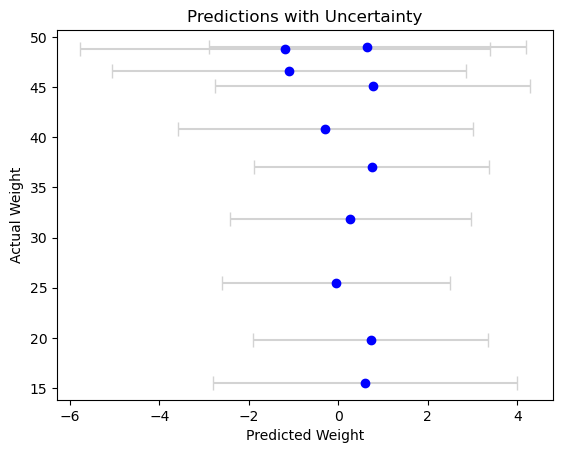

In [ ]:
# TODO maybe not a good example - need to find a better example

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Generate more robust sample data (larger and less collinear)
np.random.seed(42)
n_samples = 50
data = {
    'Length1': np.random.uniform(1, 10, n_samples),
    'Width': np.random.uniform(2, 12, n_samples),
    'Height': np.random.uniform(3, 15, n_samples),
    'Weight': 2 * np.random.uniform(1, 10, n_samples) + 3 * np.random.uniform(2, 12, n_samples) + np.random.normal(0, 2, n_samples)
}

df = pd.DataFrame(data)

# Split the data into training and testing sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Design matrix and target variable
X = np.array(train[['Length1', 'Width', 'Height']])
y = train['Weight']

# Normalize the design matrix to avoid numerical instability
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_std[X_std == 0] = 1  # Avoid division by zero
X_normalized = (X - X_mean) / X_std

# Fit the linear regression model
model = LinearRegression()
model.fit(X_normalized, y)

# Model coefficients
print("Model coefficients:", model.coef_)

# Calculate the variance of the residuals
y_pred = model.predict(X_normalized)
residuals = y - y_pred
sigma2 = np.sum(residuals**2) / (len(y) - X_normalized.shape[1] - 1)
print("Variance of the residuals:", sigma2)

# Calculate the inverse of X^T X with regularization to avoid singularity
X_T_X = np.dot(X_normalized.T, X_normalized)
reg_term = 1e-6 * np.eye(X_T_X.shape[0])  # Small regularization term
X_T_X_reg = X_T_X + reg_term
X_T_X_inv = np.linalg.inv(X_T_X_reg)

# Check for NaNs or Infs in the covariance matrix
cov_matrix = sigma2 * X_T_X_inv
if np.any(np.isnan(cov_matrix)) or np.any(np.isinf(cov_matrix)):
    raise ValueError("Covariance matrix contains NaNs or Infs. Try adjusting regularization or data.")

print("Covariance matrix of the coefficients:\n", cov_matrix)

# Generate multiple sets of coefficients from a multivariate normal distribution
num_samples = 1000
coefficients_samples = multivariate_normal.rvs(mean=model.coef_, cov=cov_matrix, size=num_samples)

# Use the generated coefficients to make predictions
X_test = np.array(test[['Length1', 'Width', 'Height']])
X_test_normalized = (X_test - X_mean) / X_std  # Normalize test data with training stats
y_pred_samples = np.dot(X_test_normalized, coefficients_samples.T)

# Calculate the mean and standard deviation of the predictions
y_pred_mean = np.mean(y_pred_samples, axis=1)
y_pred_std = np.std(y_pred_samples, axis=1)

# Plot the predictions with uncertainty
plt.errorbar(y_pred_mean, test['Weight'], xerr=y_pred_std, fmt='o', color='blue', ecolor='lightgray', capsize=5)
plt.xlabel('Predicted Weight')
plt.ylabel('Actual Weight')
plt.title('Predictions with Uncertainty')
plt.show()

## Logarithm
Logarithm is something we learn at a young age, and rarely think about it after the math class.  So it is beneficial to quickly review it, as we will extensively use it in activation functions to say the least.  

Logarithm is the exponent or power to which a base must be raised to yield a given number. 
Expressed mathematically, x is the logarithm of n to the base b if $b^x$ = n, in which case one 
writes: 
$$x = log_b n$$

For example, $2^3 = 8$; therefore, 3 is the logarithm of 8 to base 2, or $3 = log_2 8$

#### Salary, a Logarithm Example
If you are predicting salary from years of experience.
Doubling the “years of experience” might add $10,000.
This is linear in the log of the “years of experience”.
So feature engineer and create a column with the log of the years
of experience, and use that column instead.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated data
years_experience = np.array([1, 2, 4, 8, 16, 32])
salary = np.array([40000, 50000, 60000, 70000, 80000, 90000])

# Log transform
log_years_experience = np.log(years_experience)
# print(f"Log years_of_experience: {log_years_experience}")

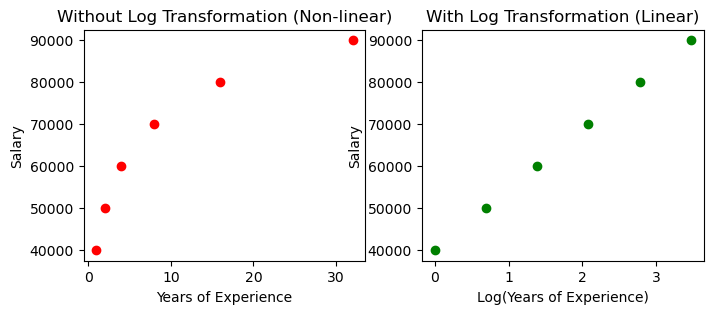

In [35]:
# Plot original relationship
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.scatter(years_experience, salary, color='red')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Without Log Transformation (Non-linear)")

# Plot log-transformed relationship
plt.subplot(1,2,2)
plt.scatter(log_years_experience, salary, color='green')
plt.xlabel("Log(Years of Experience)")
plt.ylabel("Salary")
plt.title("With Log Transformation (Linear)")

plt.show()

In [41]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Sample dataset
data = {'YearsExperience': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Salary': [40000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000]}

In [42]:
# Convert to DataFrame
df = pd.DataFrame(data)
# print(df)

# Feature engineering: add log-transformed experience column
df['Log_YearsExperience'] = np.log(df['YearsExperience'])

# Define features (using log of experience) and target
X = df[['Log_YearsExperience']]
# print(X)

y = df['Salary']
# print(y)

In [43]:
# Train a simple linear regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)
# print(X_test)
# print(y_pred)

In [44]:
# Print model coefficient and intercept
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: 35318.115224151945
Coefficient: 20669.251235270036


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared_score = r2_score(y_test, y_pred)
print(f"mae: {"{:.2f}".format(mae)}, mse: {"{:.2f}".format(mse)}, r_squared_score: {"{:.2f}".format(r_squared_score)}")

mae: 2310.97, mse: 9166239.93, r_squared_score: 0.97


### Model Evaluation

#### Mean Absolute Error (MAE)

$$MAE = \frac{1}{n} \sum_{k=1}^n |y_i - \hat{y}_i|$$

- Measures the average absolute difference between the actual values (y_i) and predicted values (ŷ_i).
- Doesn’t penalize large errors as much as MSE.

#### Mean Squared Error (MSE)

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

- Similar to MAE but squares the errors, making larger errors more impactful.

#### R Squared(Coefficient of Determination)

\begin{equation*}
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
\end{equation*}

Where:
- $y_i$  → Actual (observed) value of the dependent variable for the $i$-th data point.
- $\hat{y}_i$  → Predicted value from the model for the  $i$-th data point.
- $\bar{y}$  → Mean (average) of all actual values in the dataset.

Interpretation:
- It measures how well the model explains variance in the data.
- R² = 1 → Perfect model.
- R² = 0 → Model is as bad as predicting the mean.
- R² < 0 → Model is worse than just using the average.
- Example: If R² = 0.85, the model explains 85% of the variance in the target variable.


#### Loss Function

Logistic Loss Function (cross-entropy)

## Polynomial Regression

In the context of `PolynomialFeatures` from `sklearn.preprocessing`, the **degree** refers to the highest power (exponent) of the input features that the tool will generate when creating polynomial terms. It controls how complex the feature transformations become, allowing a linear model to fit non-linear relationships by adding higher-order terms.

### Simple Explanation
- When you set `degree = n`, `PolynomialFeatures` takes your original features (e.g., $x$) and creates new features by raising them to powers up to `n` (e.g., $x^1$, $x^2$, ..., $x^n$), plus combinations of those features if you have more than one.
- It’s like giving your model extra tools to bend and curve the fit, beyond just a straight line.

### Example
Suppose you have one feature, `Length`, and your data is `[1, 2, 3]`.

- **Degree = 1**: Just the original feature.
  - Output: `[Length]`
  - For `Length = 2`: `[2]`
  - This is a linear model (straight line).

- **Degree = 2**: Adds the square of the feature (and a constant term by default).
  - Output: `[1, Length, Length^2]` (1 is the intercept term)
  - For `Length = 2`: `[1, 2, 4]`
  - Now the model can fit a parabola (curved line).

- **Degree = 3**: Adds the cube as well.
  - Output: `[1, Length, Length^2, Length^3]`
  - For `Length = 2`: `[1, 2, 4, 8]`
  - The model can fit more complex curves.

### With Multiple Features
If you have two features, say `Length` and `Width`, the degree also includes *interaction terms* (products of the features) up to the total degree:
- **Degree = 2**:
  - Output: `[1, Length, Width, Length^2, Length*Width, Width^2]`
  - For `Length = 2`, `Width = 3`: `[1, 2, 3, 4, 6, 9]`
  - This captures how `Length` and `Width` might work together, not just independently.

### Why It Matters
- A low degree (e.g., 1) keeps things simple, fitting straight lines or planes.
- A higher degree (e.g., 3 or more) lets the model fit wiggly, non-linear patterns, but too high can overfit, chasing noise instead of the real trend.

In your pipeline, `degree = polyfeatures` means each loop tests a more flexible model, and you’re checking which degree best balances fit and generalization. It’s like choosing how many bends your line can have before it gets too twisty!

## Regularization

Regular linear regression lets coefficients grow huge to fit training data perfectly, even the noise. Ridge and Lasso add a cost for big coefficients, so the model stays simpler and generalizes better to test data.
Both Ridge and Lasso are types of linear regression that add a penalty to prevent the model from getting too complicated, which helps stop overfitting. Think of them as “disciplined” versions of regular linear regression.

### Ridge Regression:
It shrinks the coefficients (the weights of your features) toward zero, but doesn’t make them exactly zero.
The penalty discourages huge, crazy coefficients that fit noise.
Used when all features might matter a little, and you just want to tame their impact.

### Lasso Regression:
It shrinks coefficients too, but can set some to exactly zero, effectively kicking out useless features.
The penalty simplifies the model by picking key features.

When to use: Great when you suspect some features (or polynomial terms) don’t matter and should be ignored.
Key Difference: Ridge keeps all features but softens them; Lasso picks a few and drops the rest.



# Calculus
Calculus is a branch of mathematics that deals with the study of change and motion, specifically in the context of functions, rates of change, and accumulation. It’s split into two main areas: **differentiation** and **integration**.

## Derivatives

Differentiation is all about finding the rate at which things change.  Tt’s the process of computing the derivative of a function, which measures how the function’s output changes as its input changes. For example, if you’ve got a function like $f(x) = x^2$, differentiation tells you its derivative is $f'(x) = 2x$, meaning the slope of the curve gets steeper as $x$ increases.

The key idea is the **limit**. Differentiation zooms in on a tiny interval of a curve until it’s basically a straight line, calculating the slope of that line (called the tangent). This is super useful in physics (e.g., velocity is the derivative of position), economics (marginal cost is a derivative), and even machine learning (optimizing models with gradient descent).

**Example:** If you’ve got distance $s(t) = 4t^2$ (where $t$ is time), differentiation gives you velocity $v(t) = 8t$. At $t = 2$, your speed is 16 units per time—simple, but powerful.

## Gradients

## Partial Derivatives

It is a concept in multivariable calculus, used to measure the rate of change of a function with respect to one of its variables while keeping all other variables constant.

## How Partial Derivatives Work

Partial derivatives are a fundamental concept in multivariable calculus, used to measure the rate of change of a function with respect to one of its variables while keeping all other variables constant.

### Definition

Given a function $ z = f(x, y) $, the **partial derivative of $ f $ with respect to $ x $**, denoted as $ \frac{\partial f}{\partial x} $ or $ f_x $, is found by differentiating $ f $ with respect to $ x $ while treating $ y $ as a constant. Similarly, the **partial derivative of $ f $ with respect to $ y $**, denoted as $ \frac{\partial f}{\partial y} $ or $ f_y $, is found by differentiating $ f $ with respect to $ y $ while treating $ x $ as a constant.

### Notation

- $ \frac{\partial f}{\partial x} $ or $ f_x $ for the partial derivative with respect to $ x $.
- $ \frac{\partial f}{\partial y} $ or $ f_y $ for the partial derivative with respect to $ y $.

### Calculation

To calculate a partial derivative, you apply the same rules as for ordinary derivatives, but treat all variables other than the one you are differentiating with respect to as constants. For example, if $ f(x, y) = x^2 + 3xy $, to find $ \frac{\partial f}{\partial x} $, you differentiate $ x^2 $ and $ 3xy $ with respect to $ x $, treating $ y $ as a constant:

$$ \frac{\partial f}{\partial x} = 2x + 3y $$

To find $ \frac{\partial f}{\partial y} $, you differentiate $ 3xy $ with respect to $ y $, treating $ x $ as a constant:

$$ \frac{\partial f}{\partial y} = 3x $$

### Rules

Partial derivatives follow similar rules to ordinary derivatives, including:

- **Power Rule**: If $ u = x^n $, then $ \frac{\partial u}{\partial x} = nx^{n-1} $.
- **Product Rule**: If $ u = f(x, y) \cdot g(x, y) $, then $ \frac{\partial u}{\partial x} = f \cdot \frac{\partial g}{\partial x} + g \cdot \frac{\partial f}{\partial x} $.
- **Quotient Rule**: If $ u = \frac{f(x, y)}{g(x, y)} $, then $ \frac{\partial u}{\partial x} = \frac{g \cdot \frac{\partial f}{\partial x} - f \cdot \frac{\partial g}{\partial x}}{g^2} $.
- **Chain Rule**: Used for composite functions, it involves differentiating the outer function and then multiplying by the derivative of the inner function[1][4].

### Applications

Partial derivatives are crucial in various applications, including:

- **Optimization**: Finding maxima and minima of functions.
- **Physics and Engineering**: Describing rates of change in physical systems.
- **Economics**: Analyzing marginal changes in economic models.


## Loss Function and Gradient Descent

A **loss function** is like a scorecard in machine learning—it tells you how far off your model’s predictions are from the actual truth. Think of it as a number that gets bigger when your model messes up and smaller when it nails it. For example, in a regression problem (predicting numbers), a common loss function is the mean squared error: $L = \frac{1}{n} \sum (y_{\text{true}} - y_{\text{pred}})^2$, where $y_{\text{true}}$ is the real value, $y_{\text{pred}}$ is what your model guesses, and $n$ is the number of data points. The goal? Make that loss as tiny as possible.

Now, **gradient descent** is the tool that uses the loss function to improve the model. It’s the “how” to the loss function’s “what.” The loss function defines the hilly landscape whose value depends on the model’s parameters (like weights or coefficients). Gradient descent figures out how to slide down that hill to the lowest point, where the loss is minimized.

Here’s the relationship:
- The loss function gives you a surface to navigate, with peaks (bad predictions) and valleys (good predictions).
- Gradient descent uses the **gradient** of the loss function—the slope, calculated via differentiation (e.g., $\frac{\partial L}{\partial w}$ for a parameter $w$)—to decide which direction to step.
- Each step adjusts the parameters a  (e.g., $w = w - \eta \cdot \frac{\partial L}{\partial w}$) moves you closer to the sweet spot where the loss is smallest.

So, the loss function sets the target, and gradient descent is the engine that drives you there. Without a loss function, gradient descent wouldn’t know what to optimize. They’re a team: one measures the error, the other reduces it.

### Gradient Descent in Vector Notation
Gradient descent minimizes a function $J(\mathbf{w})$, where $\mathbf{w}$ is a vector of weights (parameters). For example, with 2 weights, $\mathbf{w} = [w_1, w_2]$, or with 3 weights, $\mathbf{w} = [w_1, w_2, w_3]$. The update rule in vector form is:
$$
\mathbf{w} := \mathbf{w} - \alpha \cdot \nabla J(\mathbf{w})
$$
- $\mathbf{w}$: The weight vector.
- $\alpha$: The learning rate (a scalar).
- $\nabla J(\mathbf{w})$: The gradient, a vector of partial derivatives of $J$ with respect to each weight.

The gradient $\nabla J(\mathbf{w})$ tells us the direction of steepest increase of $J$, and subtracting it moves us toward the minimum.

#### Gradient Definition
For $\mathbf{w} = [w_1, w_2]$ (2 weights):
$$
\nabla J(\mathbf{w}) = \left[ \frac{\partial J}{\partial w_1}, \frac{\partial J}{\partial w_2} \right]
$$
For $\mathbf{w} = [w_1, w_2, w_3]$ (3 weights):
$$
\nabla J(\mathbf{w}) = \left[ \frac{\partial J}{\partial w_1}, \frac{\partial J}{\partial w_2}, \frac{\partial J}{\partial w_3} \right]
$$

Each partial derivative is computed using the differentiation rules, depending on the form of $J(\mathbf{w})$.


### General Rule
1. **Compute the Gradient**: Use differentiation rules to find $\frac{\partial J}{\partial w_i}$ for each weight $w_i$.
2. **Update the Weights**: Adjust $\mathbf{w}$ by subtracting $\alpha$ times the gradient.
3. **Iterate**: Repeat until $J(\mathbf{w})$ converges to a minimum (or a stopping criterion is met).


### Example 1: Quadratic Function with 2 Weights
Let $J(\mathbf{w}) = w_1^2 + 2w_2^2$, where $\mathbf{w} = [w_1, w_2]$.

- **Power Rule**:
  - $\frac{\partial J}{\partial w_1} = \frac{\partial}{\partial w_1} (w_1^2 + 2w_2^2) = 2w_1$ (treat $w_2$ as a constant).
  - $\frac{\partial J}{\partial w_2} = \frac{\partial}{\partial w_2} (w_1^2 + 2w_2^2) = 4w_2$ (treat $w_1$ as a constant, and use constant multiple rule: $2 \cdot 2w_2 = 4w_2$).

- **Gradient**:
  $$
  \nabla J(\mathbf{w}) = [2w_1, 4w_2]
  $$

- **Update Rule**:
  $$
  \mathbf{w} := [w_1, w_2] - \alpha [2w_1, 4w_2] = [w_1 - 2\alpha w_1, w_2 - 4\alpha w_2]
  $$
  Or component-wise:
  - $w_1 := w_1 - 2\alpha w_1 = w_1 (1 - 2\alpha)$
  - $w_2 := w_2 - 4\alpha w_2 = w_2 (1 - 4\alpha)$

- **Intuition**: If $w_1 = 1$, $w_2 = 1$, and $\alpha = 0.1$:
  - $\nabla J = [2, 4]$
  - New $\mathbf{w} = [1 - 0.2 \cdot 2, 1 - 0.2 \cdot 4] = [0.6, 0.2]$
  - $J$ decreases from $1^2 + 2 \cdot 1^2 = 3$ to $0.6^2 + 2 \cdot 0.2^2 = 0.36 + 0.08 = 0.44$.

### Example 2: Linear Model with 3 Weights
Let $J(\mathbf{w}) = \frac{1}{2} (w_1 + w_2 x + w_3 x^2 - y)^2$, a squared error for one data point $(x, y)$, with $\mathbf{w} = [w_1, w_2, w_3]$. Assume $x$ and $y$ are constants (e.g., $x = 1$, $y = 2$).

- Define $h(\mathbf{w}) = w_1 + w_2 x + w_3 x^2$, so $J(\mathbf{w}) = \frac{1}{2} (h(\mathbf{w}) - y)^2$.

- **Chain Rule**:
  - $\frac{\partial J}{\partial w_i} = \frac{\partial}{\partial w_i} \left[ \frac{1}{2} (h - y)^2 \right] = (h - y) \cdot \frac{\partial h}{\partial w_i}$.

- Compute $\frac{\partial h}{\partial w_i}$:
  - $\frac{\partial h}{\partial w_1} = 1$ (sum rule, others are constants).
  - $\frac{\partial h}{\partial w_2} = x$.
  - $\frac{\partial h}{\partial w_3} = x^2$ (power rule).

- Gradient:
  $$
  \nabla J(\mathbf{w}) = (h(\mathbf{w}) - y) \cdot [1, x, x^2]
  $$

- For $x = 1$, $y = 2$, and $\mathbf{w} = [1, 1, 1]$:
  - $h = 1 + 1 \cdot 1 + 1 \cdot 1^2 = 3$,
  - $h - y = 3 - 2 = 1$,
  - $\nabla J = 1 \cdot [1, 1, 1] = [1, 1, 1]$.

- Update with $\alpha = 0.1$:
  $$
  \mathbf{w} = [1, 1, 1] - 0.1 \cdot [1, 1, 1] = [0.9, 0.9, 0.9]
  $$

- Check: $J$ drops from $\frac{1}{2} (3 - 2)^2 = 0.5$ to $\frac{1}{2} (0.9 + 0.9 + 0.9 - 2)^2 = \frac{1}{2} (0.7)^2 = 0.245$.

### Summary
- The gradient uses differentiation rules to find the slope of $J$ in each direction ($w_1, w_2, w_3$).
- Moving opposite the gradient reduces $J$, as $\nabla J$ points uphill, and $-\nabla J$ points downhill.
- The learning rate $\alpha$ ensures steps are small enough to converge to the minimum (e.g., $\mathbf{w} = [0, 0]$ in Example 1, or $\mathbf{w}$ where $h = y$ in Example 2).

This vector approach scales to any number of weights, making it the backbone of optimizing complex models! Let me know if you’d like more examples or details.